In [1]:
from PIL import Image
import glob
import numpy as np
from numpy import linalg as la
from pylab import *
import matplotlib.pyplot as plt 

image=[]
flattened_images  =[]
def griddisplay(image_list):
    rows = int(len(image_list) / 5) 
    fig1, axes_array = plt.subplots(rows, 5)
    fig1.set_size_inches(5,5)
    k=0
    for row in range(rows):
        for col in range(5):    
            im = np.array(Image.fromarray(image_list[k]).resize((100, 100), Image.ANTIALIAS))
            axes_array[row][col].imshow(im,cmap=plt.cm.gray) 
            axes_array[row][col].axis('off')
            k = k+1
    plt.show()

for i in range(0,75):
    filename = r'C:\cv-task5-1\AllData\TrainingImages\Face' +str(i) + '.jpg'
    im=Image.open(filename).convert('L')
    im= np.asarray(im,dtype=float)/255.0 
    image.append(im)

TrainImages_num = len(image)


# print('Original Images')
# griddisplay(image)


for i in range(TrainImages_num):
    p=image[i].flatten()
    flattened_images.append(p)
A_transpose = np.matrix(flattened_images)
A = np.transpose(A_transpose)

mean= np.mean(A,1)
b= mean.reshape(128,128)
resized_mean=np.array(Image.fromarray(np.asarray(b)).resize((100, 100), Image.BILINEAR))
# imshow(resized_mean,cmap=plt.cm.gray)
# plt.axis('off')
# plt.title('Mean Face')
# plt.show()


zero_mean =[]
column =0
Zero_mean_matrix= np.ones((16384,TrainImages_num))
for values in flattened_images:
    zm= A[:,column] - mean         # zm = values - mean
    zm = np.squeeze(zm)
    Zero_mean_matrix[:,column] =zm
    zm_images = zm.reshape(128,128)
    zero_mean.append(zm)
    column = column +1
# print('Zero mean faces')
# griddisplay(zero_mean)

d = (np.dot(np.transpose(Zero_mean_matrix),Zero_mean_matrix))/425
u_list =[]
w2, v2 = la.eigh(d)

for ev in v2:
    ev_transpose = np.transpose(np.matrix(ev))
    u = np.dot(Zero_mean_matrix,ev_transpose)                        
    u = u / np.linalg.norm(u)
    u_i= u.reshape(128,128)
    u_list.append(u_i)

# print('eigenfaces')
# griddisplay(u_list)


C:\Users\sweet\AppData\Local\Temp\ipykernel_28560\3232103008.py:44: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  resized_mean=np.array(Image.fromarray(np.asarray(b)).resize((100, 100), Image.BILINEAR))


In [2]:
dict ={}
def Reconstruct(k, boolean):
    weights=np.zeros((TrainImages_num,k))
    matrixU = np.zeros((16384,k))
    c =0
    for val in range(k-1,-1,-1):
        matrixU[:,c] = u_list[val].flatten()
        c = c+1
    rec_face=[]
    for face_num in range(0,TrainImages_num):
        w = np.dot(np.transpose(matrixU) ,Zero_mean_matrix[:,face_num])
        weights[face_num,:] =w

        face = np.dot(w, np.transpose(matrixU))
        minf = np.min(face)
        maxf = np.max(face)
        face = face-float(minf)
        face = face/float((maxf-minf))
        face = face+np.transpose(mean)
        reshape_face = face.reshape(128,128)
        rec_face.append( reshape_face)
    # if boolean is True:
    #     griddisplay(rec_face)
    dict[k] = weights
    # print(weights)
# print('\t\tk=2')
# Reconstruct(2,True)
# print('\t\tk=5')
# Reconstruct(5,True)
print('\t\tk=39')
Reconstruct(60,True)


		k=39


		k=39
10.231964068056035
11


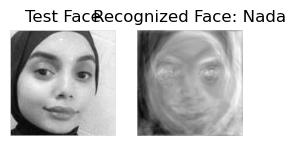

33.74876875170104
40


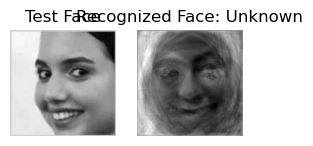

5.3327819675556185
29


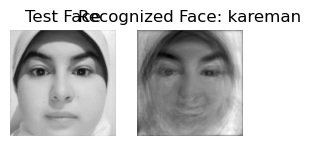

38.722862680264306
39


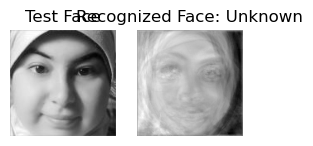

0.0
16


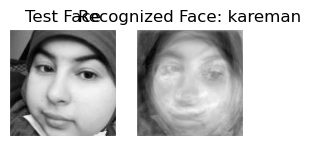

32.726268233277494
47


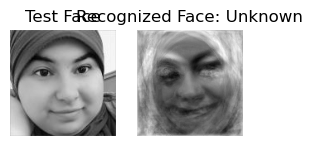

5.826164979769605
26


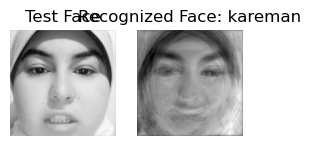

39.27933093658897
16


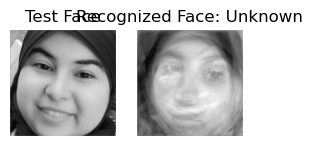

19.783633392618775
20


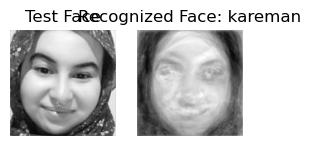

0.0
17


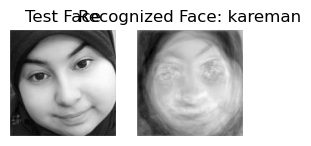

7.684505745004735
24


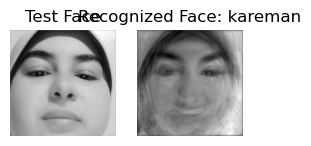

0.0
27


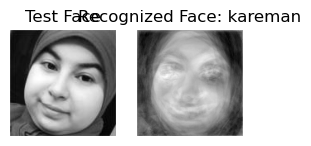

11.579222073768738
12


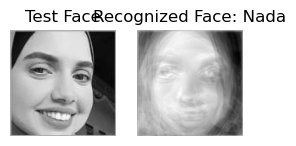

18.865195604174648
42


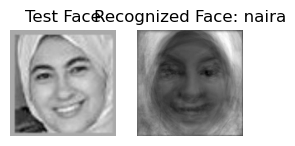

15.707003073011151
42


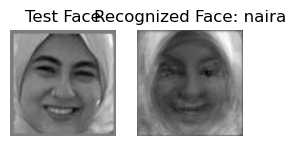

27.655159903739406
40


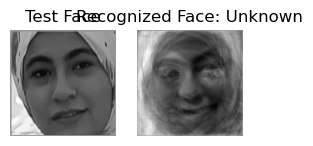

13.45696811915905
33


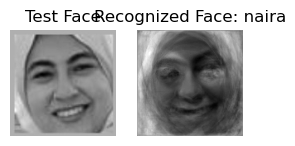

19.825118436754384
41


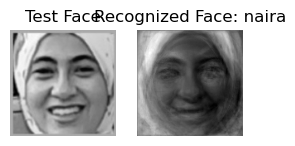

13.53354944750728
30


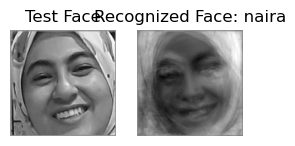

23.186784013030895
53


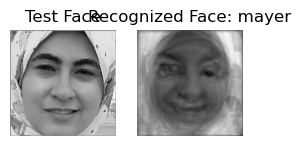

16.17497029660441
40


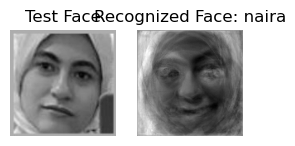

25.216410579771846
31


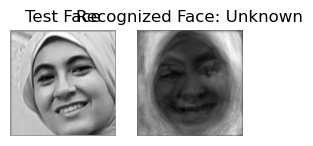

19.617734028811356
46


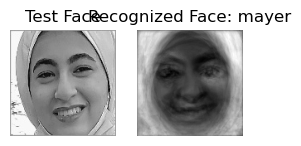

19.559825584208298
13


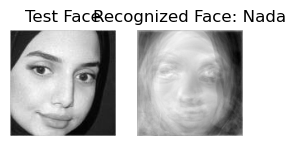

0.0
45


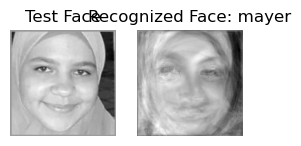

23.707713477495375
42


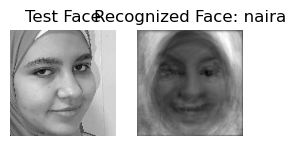

28.912382278636453
38


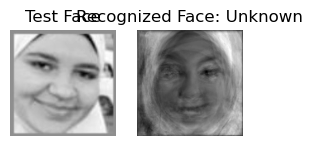

0.0
51


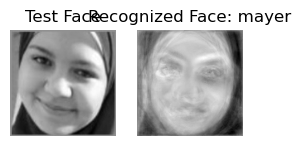

0.0
50


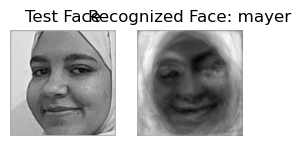

18.91877979789221
47


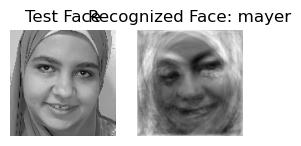

0.0
56


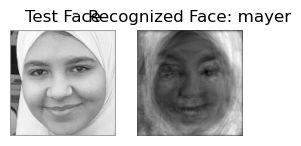

0.0
57


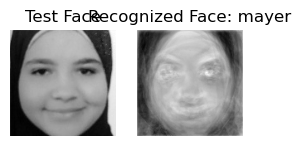

19.19860936538182
47


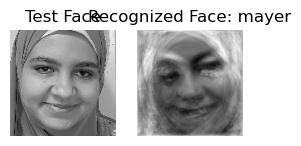

0.0
59


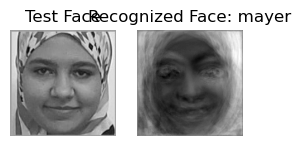

23.032822809775357
55


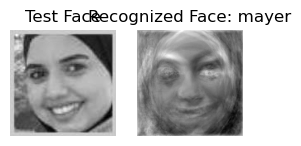

0.0
60


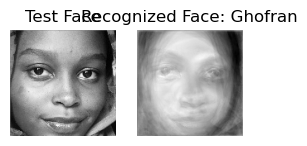

0.0
61


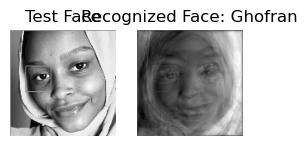

0.0
62


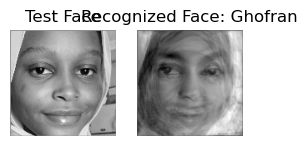

0.0
63


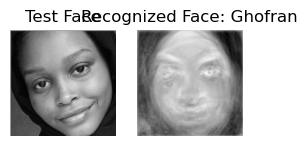

0.0
69


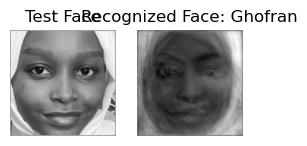

0.0
66


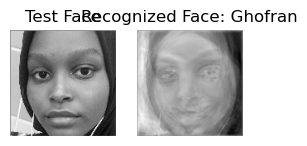

0.0
65


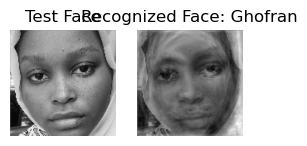

0.0
64


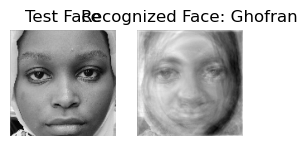

0.0
68


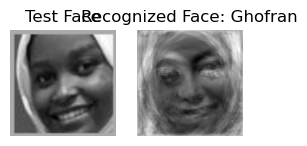

0.0
67


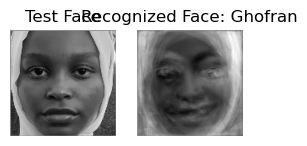

25.674520910988903
7


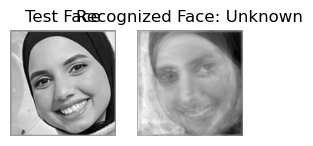

21.791159515750465
42


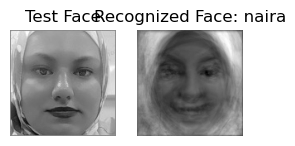

14.199639565366082
47


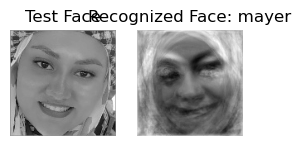

20.779062475623693
55


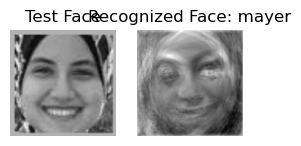

56.10176696608209
57


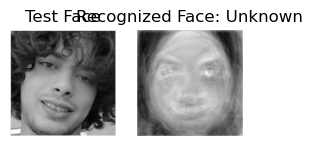

28.257615232571077
46


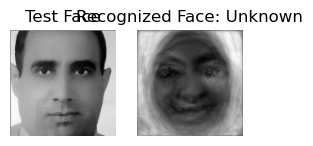

24.997210426775997
38


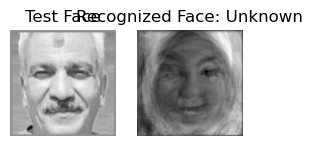

37.7018438709518
10


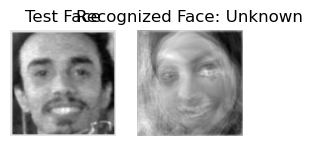

21.749140331027707
3


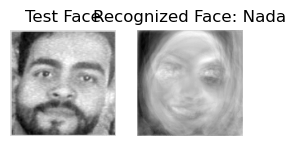

17.150612281939953
43


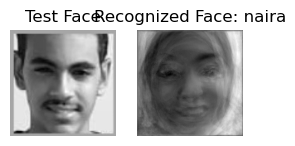

24.733959146980258
43


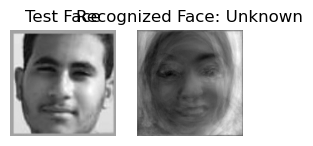

20.4991658852038
3


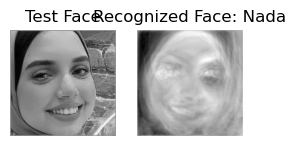

19.372290720743553
33


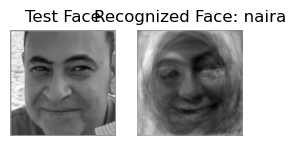

14.21958102828282
55


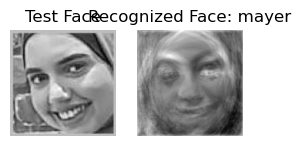

17.74685531126451
10


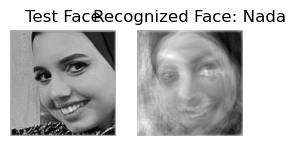

26.46601767189175
9


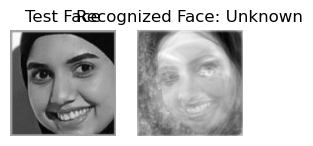

In [5]:
test_images=[]

for filename in glob.glob(r'C:\cv-task5-1\AllData\TestingImages\*.jpg'):
    im=Image.open(filename).convert('L')
    im= np.asarray(im,dtype=float)/255.0 
    test_images.append(im)
    
def Project(k, zero_mean_test, threshold):
    matrixU = np.zeros((16384, k))
    c = 0
    name=""
    for val in range(k-1, -1, -1):
        matrixU[:, c] = u_list[val].flatten()
        c = c + 1
    w = np.dot(np.transpose(matrixU), np.transpose(zero_mean_test))
    original_w_k = dict[k]
    dist = []
    for wt_vectors in original_w_k:
        dist.append(np.linalg.norm(wt_vectors-w.T))
    # print(len(dist))
    print (np.min(dist))
    nearest_face = np.argmin(dist)
    print (nearest_face)
    nearest_face_weights = original_w_k[nearest_face]
    zero_mean_test = zero_mean_test + np.transpose(mean)
    face = np.dot(nearest_face_weights, np.transpose(matrixU))
    face = face + np.transpose(mean)
    reshape_face = face.reshape(128, 128)
    if np.min(dist) < threshold:  # Nonface
        index = nearest_face
        # name = names[index]
        if index in range(0,15):
            name="Nada"
        elif index in range(15,30):
            name="kareman"
        elif index in range(30,45):
            name="naira"
        elif index in range(45,60):
            name="mayar"
        elif index in range(60,70):
            name="Ghofran"    
    else:
        index = -1
        name = 'Unknown'
    return index, name, reshape_face
    
def runs(k):
    for num in range(len(test_images)):
        t = test_images[num]
        test = t.flatten()
        zero_mean_test = test - np.transpose(mean)
        index, name, face = Project(k, zero_mean_test, 24)  # threshold = 80
        fig1, axes_array = plt.subplots(1, 2)
        fig1.set_size_inches(3, 3)
        image_plot = axes_array[0].imshow(t, cmap=plt.cm.gray)
        axes_array[0].axis('off')
        axes_array[0].set(title='Test Face')
        image_plot = axes_array[1].imshow(face, cmap=plt.cm.gray)
        axes_array[1].axis('off')
        axes_array[1].set(title='Recognized Face: ' + name)
        plt.show()
# runs(2)
# print('\t\tk=5')
# runs(5)

print('\t\tk=39')
runs(60)

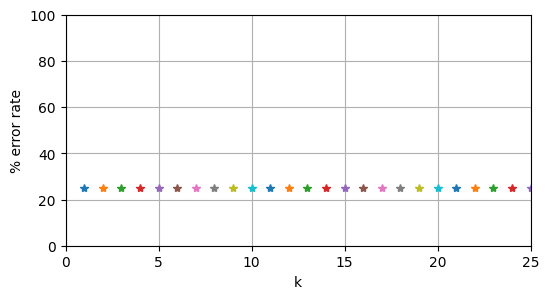

In [6]:
def Error(k,threshold):
    Nonfaces = 10
    total_images = 40
    nf_detected = 0
    matrixU = np.zeros((16384,k))
    c = 0
    
    for val in range(k-1,-1,-1):
        matrixU[:,c] = u_list[val].flatten()
        c = c+1
    
    for t in test_images:
        test = t.flatten()
        zero_mean_test = test-np.transpose(mean)
        w = np.dot(np.transpose(matrixU) ,np.transpose(zero_mean_test))
        original_w_k =dict[k]
        dist =[]
        for wt_vectors in original_w_k:
            dist.append(np.linalg.norm(wt_vectors-w.T))
        
        if np.min(dist) > threshold:
            nf_detected = nf_detected + 1

    
    error_percentage = ((Nonfaces - nf_detected)/total_images) *100
    return error_percentage

xt =[]
for x in range(1,40):
    Reconstruct(x,False)
    xt.append(x)


fig, axes1 = plt.subplots(1, 1)
fig.set_size_inches(6,3)
for x_pts in xt:
    y= Error(x_pts,80)
    axes1.plot(x_pts, y,marker='*')
axes1.set(xlabel="k",ylabel="% error rate",ylim=(0,100),xlim=(0,25))
plt.grid(True)
plt.show()
